# Artificial Neural Network (ANN) Implementation

In [ ]:
import pandas as pd 
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

### Data Loading and Preprocessing

In [77]:
df = pd.read_csv('churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [78]:
# devide dataset into dependent and independent features
# eleminate row number, customer id and surname
X = df.iloc[:,3:13]
y=df.iloc[:,13]

In [79]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [80]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

### Feature Engineering

In [ ]:
# encode categorical data 
geography= pd.get_dummies(X['Geography'],drop_first=True).astype(int)
gender= pd.get_dummies(X['Gender'],drop_first=True).astype(int)


In [82]:
X= X.drop(['Geography','Gender'],axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [83]:
X=pd.concat([X,geography,gender],axis=1)

### Splitting the Dataset into Training and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

- in ANN we will need feature scalling 

- for which algorithems, feature engineering is reqired ?
    - Ann? YES
    - Linear regression? YES
    - Logistic Regression? YES
    - KNN ? YES
    - K-MEANS? YES
    - Decission Tree? Not Neciccerly
    - Random forest? Not Neciccerly

    - Whenever we have dictance base problems 
    - whenever optmizers are involved , like gradient decient ... etc etc 



In [85]:
# feature scalling 
# minimax scalling (CNN) or standard scalling (depends on z score , good for ANN)?

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [86]:
X_train.shape

(8000, 11)

### Creating the Artificial Neural Network (ANN)

In [87]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout  

# initialize ANN
classifier = Sequential()

In [88]:
# add input layer 
# we have 11 features or colomns , so the input layer will have 11 neurons or nodes
classifier.add(Dense(units = 11, activation='relu'))

In [89]:
# adding the first hidden layer
classifier.add(Dense(units = 7 , activation='relu'))
classifier.add(Dropout(0.2))

In [ ]:
# adding the second hidden layer 
classifier.add(Dense(units = 6 , activation='relu'))
classifier.add(Dropout(0.2)) 

In [91]:
# adding output layer 
classifier.add(Dense(units =1, activation='sigmoid'))

In [92]:
# train the network
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) # by defult adam is using a learning rate of 0.001

In [93]:
import tensorflow as tf
# if u wanna change the learning rate , but skip that for now
# opt =tf.keras.optimizers.Adam(learning_rate = 0.01)

In [94]:
# Early stopping -> when the accuracy is not at all increasing and it's moving 
# with same vlue ! there whe should stop the code 
# we will do Automatic stopping of the training process
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           min_delta=0.001,
                           patience=20,
                           verbose=1,
                           mode = 'auto',
                           baseline=None , 
                           restore_best_weights= False)

In [95]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000, callbacks=[early_stop]) 

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7247 - loss: 0.5970 - val_accuracy: 0.7955 - val_loss: 0.4835
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7827 - loss: 0.5072 - val_accuracy: 0.7955 - val_loss: 0.4659
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7923 - loss: 0.4698 - val_accuracy: 0.7955 - val_loss: 0.4495
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7880 - loss: 0.4716 - val_accuracy: 0.7955 - val_loss: 0.4429
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8013 - loss: 0.4533 - val_accuracy: 0.7970 - val_loss: 0.4372
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8016 - loss: 0.4391 - val_accuracy: 0.8092 - val_loss: 0.4332
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8082 - loss: 0.4438 - val_accuracy: 0.8141 - val_loss: 0.4288
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8186 - loss: 0.4197 - 

it stopped at epoch 30 

### Visualizing Model Training History

In [96]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

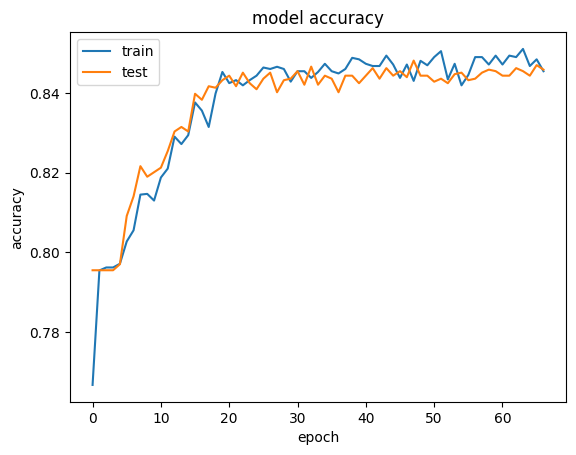

In [97]:
# summerize the history of accuracy 
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

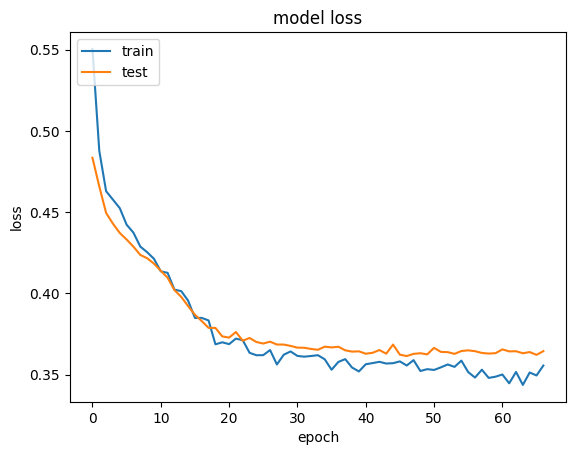

In [ ]:
# summerize the history of loss
plt.plot(model_history.history['loss']) 
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

### making predections and evaluating the model

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [100]:
# make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1538,   57],
       [ 222,  183]])

In [101]:
# calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.8605

In [102]:
# get the weights 
weights = classifier.get_weights()
weights

[array([[-1.81486756e-02, -2.26379588e-01,  4.51183468e-01,
         -1.27372876e-01, -2.42610034e-02, -1.15514189e-01,
         -6.73740134e-02, -2.62620151e-01, -7.56189004e-02,
         -1.44924685e-01,  1.11195505e-01],
        [ 5.44534683e-01,  1.55138671e-01, -4.37317252e-01,
          3.60349774e-01,  8.96028161e-01, -7.29716003e-01,
         -6.20798886e-01,  2.28488557e-02,  7.04032838e-01,
         -4.09117669e-01,  2.78629005e-01],
        [ 3.13825682e-02, -4.50883843e-02, -2.62988299e-01,
         -1.83105245e-02, -1.64928705e-01, -2.52855539e-01,
          4.17155921e-02,  2.87838101e-01,  2.74658233e-01,
          2.30644569e-01,  2.90287137e-01],
        [ 4.57572937e-02, -2.02345654e-01, -2.95307845e-01,
         -4.18828368e-01,  7.08648145e-01,  7.26428255e-02,
         -2.67272472e-01, -3.81266654e-01, -2.42052823e-01,
          4.43288535e-02, -1.21491514e-01],
        [-3.00124317e-01, -1.53118055e-02,  6.90826923e-02,
         -1.31491733e+00,  9.54236805e-01,  